--- Step 1: Data Loaded Successfully ---
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


--- Step 2: Preprocessing Complete ---
Features have been successfully scaled.

--- Step 3: Data Split Complete ---
Training set shape: (614, 8)
Testing set shape: (154, 8)

Optimal value of k found: 37
--- Step 4: Model Training C

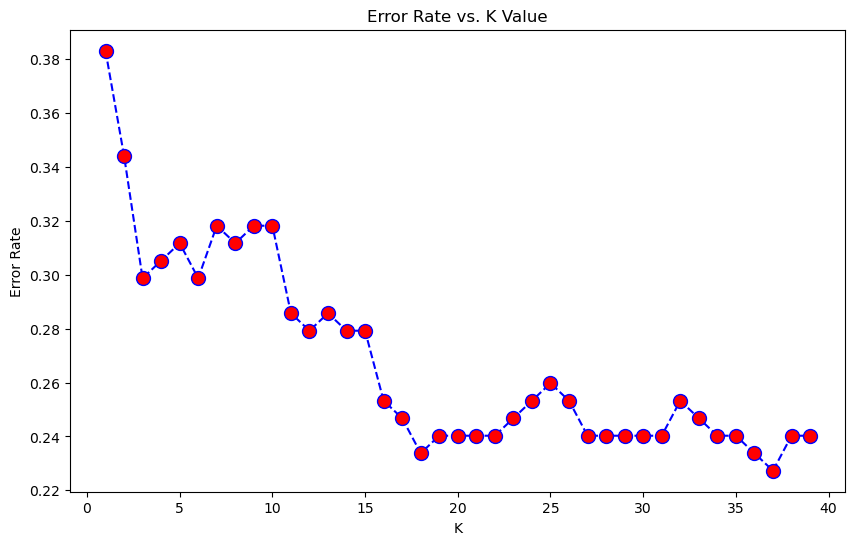

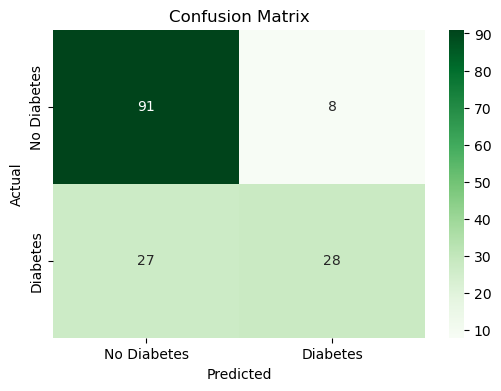

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load the Data ---
    # This dataset is a standard for diabetes prediction tasks.
    url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
    df = pd.read_csv(url)
    print("--- Step 1: Data Loaded Successfully ---")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\n")


    # --- Step 2: Preprocess the Data ---
    # Separate features (X) and target (y)
    X = df.drop('Outcome', axis=1)
    y = df['Outcome'] # 0 = No Diabetes, 1 = Diabetes

    # Scale the features. This is critical for distance-based algorithms like KNN.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("--- Step 2: Preprocessing Complete ---")
    print("Features have been successfully scaled.\n")


    # --- Step 3: Split the Data ---
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    print("--- Step 3: Data Split Complete ---")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}\n")


    # --- Step 4: Train the KNN Model (with optimal 'k') ---
    # Find the optimal value for 'k' using the elbow method
    error_rate = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    # Find the k with the minimum error
    optimal_k = error_rate.index(min(error_rate)) + 1
    print(f"Optimal value of k found: {optimal_k}")

    # Train the final model with the optimal k
    knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_model.fit(X_train, y_train)
    print("--- Step 4: Model Training Complete ---\n")


    # --- Step 5: Evaluate the Model ---
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("--- Step 5: Model Evaluation ---")
    print(f"Model Accuracy with k={optimal_k}: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)']))

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.savefig('knn_elbow_curve.png')
    print("\nElbow curve saved as 'knn_elbow_curve.png'")
    
    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    print("Confusion matrix saved as 'confusion_matrix.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")